In [1]:
from OpenVisus import *
from backend_v2 import *
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### Original Gaussian

/Users/aashishpanta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(50, 100, 50)


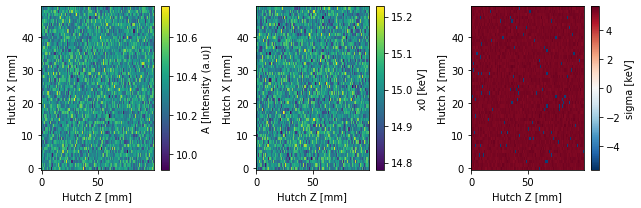

In [2]:
import xarray as xr
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

# Just use some fake data for now.
data_shape = (50, 100, 50)
axes = [{'name':f'axis_{i}', 'size':d_s} for i,d_s in enumerate(data_shape)]
signal_axis = np.arange(data_shape[-1])
def gaussian(x, A, x0, sigma):
    return(A * np.e ** (-((x-x0)/(sigma*np.sqrt(2)))**2))
data = np.random.random(data_shape) + gaussian(signal_axis, 10,15,5)

parameters = np.empty((3, *data_shape[0:-1]))

print(data.shape)

for index in np.ndindex(*data_shape[0:-1]):
    popt = curve_fit(gaussian, signal_axis, data[index])
    parameters[0][index] = popt[0][0]
    parameters[1][index] = popt[0][1]
    parameters[2][index] = popt[0][2]
    
spectra_coords = {'x':('x',np.arange(data_shape[0]),{'units':'mm', 'long_name':'Hutch X'}),
                  'y':('y',np.arange(data_shape[1]),{'units':'mm', 'long_name':'Hutch Z'}),
                  'E':('E',np.arange(data_shape[2]),{'units':'keV', 'long_name':'MCA channel'})}
fit_coords = {'x':('x',np.arange(data_shape[0]),{'units':'mm', 'long_name':'Hutch X'}),
              'y':('y',np.arange(data_shape[1]),{'units':'mm', 'long_name':'Hutch Z'})}
data_vars = {'A':xr.DataArray(parameters[0], coords=fit_coords, attrs={'units':'Intensity (a.u)'}),
             'x0':xr.DataArray(parameters[1], coords=fit_coords, attrs={'units':'keV'}),
             'sigma':xr.DataArray(parameters[2], coords=fit_coords, attrs={'units':'keV'}),
             'spectra':xr.DataArray(data, coords=spectra_coords, attrs={'units':'Intensity (a.u)'})}


dset = xr.Dataset(data_vars=data_vars, coords=spectra_coords)

fig, axs = plt.subplots(1,3, figsize=(9, 3))
dset['A'].plot(ax=axs[0])
dset['x0'].plot(ax=axs[1])
dset['sigma'].plot(ax=axs[2])
fig.tight_layout()

In [3]:
dset['sigma'].values

array([[ 5.33635057,  5.38225984,  5.3114623 , ...,  5.37904349,
         5.26819393,  5.45759907],
       [ 5.50010303,  5.30303239,  5.5704064 , ...,  5.42400026,
         5.33901724,  5.33090988],
       [-5.46662592,  5.36161718,  5.45285297, ...,  5.38925948,
         5.27399455,  5.41760487],
       ...,
       [ 5.33687146,  5.32653952,  5.50827236, ...,  5.32705289,
         5.4726006 ,  5.25825816],
       [ 5.43136795,  5.34863817,  5.47117153, ...,  5.34748229,
         5.36612215,  5.42379545],
       [ 5.30937591,  5.31149192,  5.3978193 , ...,  5.28662887,
         5.22930163,  5.27347443]])

In [4]:
spectra_coords = {'x':('x',np.arange(data_shape[0]),{'units':'mm', 'long_name':'Hutch X'}),
                  'y':('y',np.arange(data_shape[1]),{'units':'mm', 'long_name':'Hutch Z'}),
                  'E':('E',np.arange(data_shape[2]),{'units':'keV', 'long_name':'MCA channel'})}
fit_coords = {'x':('x',np.arange(data_shape[0]),{'units':'mm', 'long_name':'Hutch X'}),
              'y':('y',np.arange(data_shape[1]),{'units':'mm', 'long_name':'Hutch Z'})}
data_vars = {'A':xr.DataArray(parameters[0], coords=fit_coords, attrs={'units':'Intensity (a.u)'}),
             'x0':xr.DataArray(parameters[1], coords=fit_coords, attrs={'units':'keV'}),
             'sigma':xr.DataArray(parameters[2], coords=fit_coords, attrs={'units':'keV'}),
             'spectra':xr.DataArray(data, coords=spectra_coords, attrs={'units':'Intensity (a.u)'})}


### Convert to IDX

In [5]:
# filename='gauss.idx'
# field=[Field('A','float64'),Field('x0','float64'),Field('sigma','float64')]
# db=CreateIdx(url=filename,fields=field,dims=[100,50],time=[0,0,'time%0000d/'])

In [6]:
# db.write(dset['A'].values,field='A',time=0)
# db.write(dset['x0'].values,field='x0',time=0)
# db.write(dset['sigma'].values,field='sigma',time=0)

In [7]:
# da_attrs={'units':'Intensity(a.u)'}
da_attrs={'A':{'units':'Intensity (a.u)'},
         'x0':{'units':'keV'},
         'sigma':{'units':'keV'}}

### Read from IDX

In [8]:
db1=xr.open_dataset('gauss.idx',engine=OpenVisusBackendEntrypoint,da_attrs=da_attrs,coords=spectra_coords)
data=db1.isel(time=0,resolution=13)
data

Adding field  A shape  [1, 50, 100, 14] dtype  float64 labels  ['time', 'x', 'y', 'resolution'] timesteps  [0] Max Resolution  13
Adding field  x0 shape  [1, 50, 100, 14] dtype  float64 labels  ['time', 'x', 'y', 'resolution'] timesteps  [0] Max Resolution  13
Adding field  sigma shape  [1, 50, 100, 14] dtype  float64 labels  ['time', 'x', 'y', 'resolution'] timesteps  [0] Max Resolution  13


<xarray.Dataset>
Dimensions:  (x: 50, y: 100, E: 50)
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * E        (E) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
Data variables:
    A        (x, y) float64 ...
    x0       (x, y) float64 ...
    sigma    (x, y) float64 ...

_raw_indexing_method key (0, slice(None, None, None), slice(None, None, None), 13)
13
(50, 100)
_raw_indexing_method key (0, slice(None, None, None), slice(None, None, None), 13)
13
(50, 100)
_raw_indexing_method key (0, slice(None, None, None), slice(None, None, None), 13)
13
(50, 100)


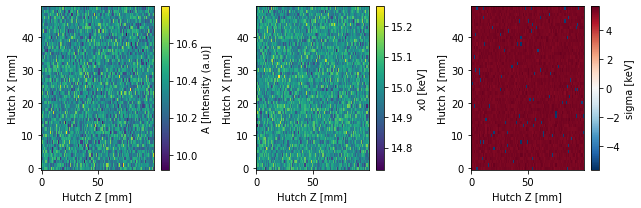

In [9]:
fig, axs = plt.subplots(1,3, figsize=(9, 3))
data['A'].plot(ax=axs[0])
data['x0'].plot(ax=axs[1])
data['sigma'].plot(ax=axs[2])
fig.tight_layout()